# Imports

In [32]:
from fastai.vision.widgets import *
import fastbook
from fastbook import *

In [33]:
path=Path('chest_xray')

In [34]:
path.ls()

(#5) [Path('chest_xray/train'),Path('chest_xray/test'),Path('chest_xray/__MACOSX'),Path('chest_xray/.ipynb_checkpoints'),Path('chest_xray/val')]

##### There are one folder for the training set, one for the validation set and one for the test set.

In [35]:
#Let's have a look at the number of images for each folder.
(path/'val'/'PNEUMONIA').ls(),(path/'val'/'NORMAL').ls()

((#8) [Path('chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg'),Path('chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg'),Path('chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'),Path('chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg'),Path('chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'),Path('chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg'),Path('chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg'),Path('chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg')],
 (#8) [Path('chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'),Path('chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'),Path('chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'),Path('chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'),Path('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'),Path('chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'),Path('chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'),Path('chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg')])

The validation set contains only 16 images, it will not be enough in order to validate our model. Let's have a look at the test set. May be we can mlerge test and val set to create a good validation set.

In [36]:
(path/'test'/'PNEUMONIA').ls(),(path/'test'/'NORMAL').ls()

((#390) [Path('chest_xray/test/PNEUMONIA/person99_bacteria_473.jpeg'),Path('chest_xray/test/PNEUMONIA/person1_virus_8.jpeg'),Path('chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg'),Path('chest_xray/test/PNEUMONIA/person150_bacteria_717.jpeg'),Path('chest_xray/test/PNEUMONIA/person1664_virus_2877.jpeg'),Path('chest_xray/test/PNEUMONIA/person171_bacteria_826.jpeg'),Path('chest_xray/test/PNEUMONIA/person139_bacteria_664.jpeg'),Path('chest_xray/test/PNEUMONIA/person86_bacteria_428.jpeg'),Path('chest_xray/test/PNEUMONIA/person85_bacteria_423.jpeg'),Path('chest_xray/test/PNEUMONIA/person94_bacteria_456.jpeg')...],
 (#234) [Path('chest_xray/test/NORMAL/IM-0061-0001.jpeg'),Path('chest_xray/test/NORMAL/NORMAL2-IM-0349-0001.jpeg'),Path('chest_xray/test/NORMAL/NORMAL2-IM-0201-0001.jpeg'),Path('chest_xray/test/NORMAL/IM-0022-0001.jpeg'),Path('chest_xray/test/NORMAL/NORMAL2-IM-0079-0001.jpeg'),Path('chest_xray/test/NORMAL/NORMAL2-IM-0370-0001.jpeg'),Path('chest_xray/test/NORMAL/NORMAL2-IM-002

In [37]:
(path/'val').ls()

(#2) [Path('chest_xray/val/PNEUMONIA'),Path('chest_xray/val/NORMAL')]

Our validation set will be composed of the testing set and the validation set. It will create a validation set of 642 images.

# Prepare the Data for an Exploratory Data Analysis

In [59]:
#Using the DataBlockAPI
pneumonia=DataBlock(
    ##types for the independent and dependent variables
    blocks=(ImageBlock, CategoryBlock),
    ##returns a list of all the images in the path (it takes a path as argument)
    get_items=get_image_files,
    #SPlit the data into validation and training set based on folder name.
    splitter=GrandparentSplitter(train_name='train', valid_name=('val','test')),
    #how to create the labels for the dependent variable
    get_y=parent_label,
    #resizing the images to the same size
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [60]:
#A DataLoaders includes validation and training DataLoaders. 
#DataLoader is a class that provides batches of a few items at a time to the GPU (64 items).
dls = pneumonia.dataloaders(path)

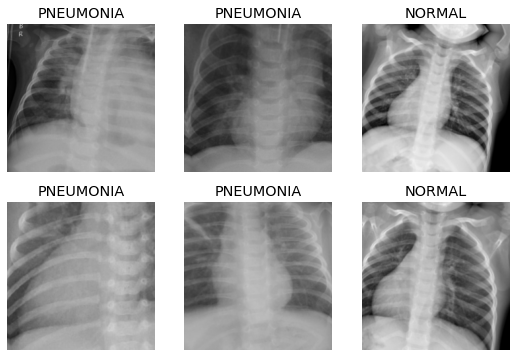

In [44]:
dls.train.show_batch(max_n=6,nrows=2)

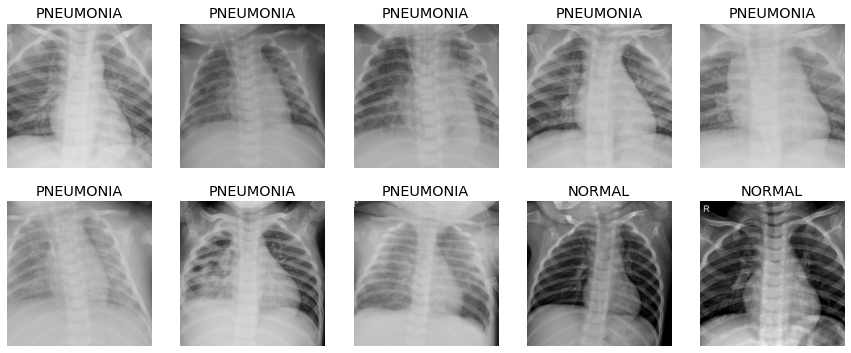

In [45]:
dls.valid.show_batch(max_n=10,nrows=2)

# Checking Data Augmentation

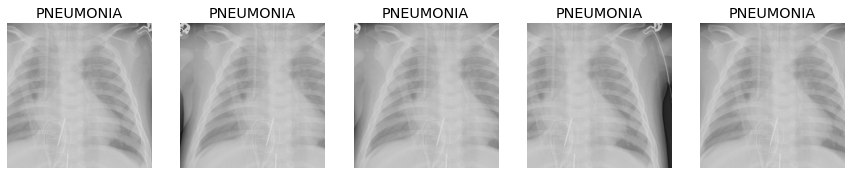

In [55]:
dls.train.show_batch(max_n=5,nrows=1,unique=True)

# Model Building

In [61]:
#Creating the model
learn=cnn_learner(dls,resnet34,pretrained=True,metrics=error_rate)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0008317637839354575)

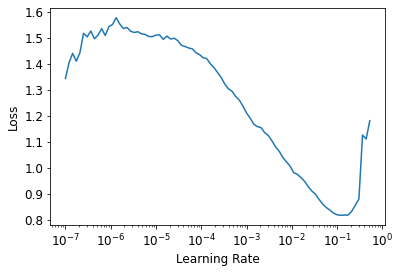

In [57]:
learn.lr_find()

In [63]:
lr=5e-3
learn.fit_one_cycle(8,max_lr=lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.176941,0.338121,0.096875,00:39
1,0.160005,0.262397,0.087500,00:40
2,0.133262,0.267743,0.075000,00:39


SuggestedLRs(lr_min=4.78630090583465e-07, lr_steep=7.585775847473997e-07)

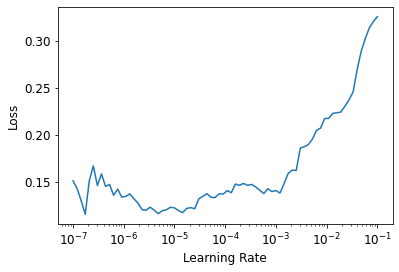

In [95]:
learn.unfreeze()
learn.lr_find()

In [96]:
learn.fit_one_cycle(3,max_lr=7e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.160997,0.271872,0.103125,02:53
1,0.093149,0.440156,0.134375,02:54
2,0.057770,0.380815,0.110937,02:54


# Model Interpretation

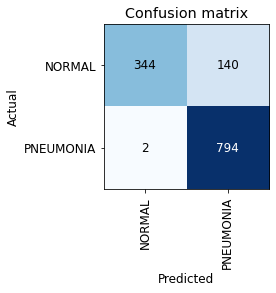

In [97]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()